<a href="https://colab.research.google.com/github/legendary-beast/Python-Programs/blob/main/Random_Forest_Fish_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fish = pd.read_csv('Fish.csv')

In [4]:
fish.isnull().sum().sum()

0

In [34]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
x = fish.drop(columns=['Species'])
y = fish['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=5)

params = {
    'max_depth': (1,15),
    'min_samples_leaf': (1,4),
    'min_samples_split': (2,10),
    'n_estimators': (1,50),
    'min_impurity_decrease':(0.1,1.0)
}

random_search = RandomizedSearchCV(rf, params, n_iter=10)
random_search.fit(x_train, y_train)

random_search.best_params_,
random_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomForestClassifier(max_depth=15, min_impurity_decrease=0.1,
                       min_samples_leaf=4, n_estimators=50, random_state=5)

In [41]:
rf = RandomForestClassifier(max_depth=5, min_impurity_decrease=0.05, n_estimators=10,
                       random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_impurity_decrease=0.05, n_estimators=10,
                       random_state=0)

In [42]:
rf.score(x_test,y_test)

0.75

In [32]:
y_pred = rf.predict(x_test)

Text(95.72222222222221, 0.5, 'Truth')

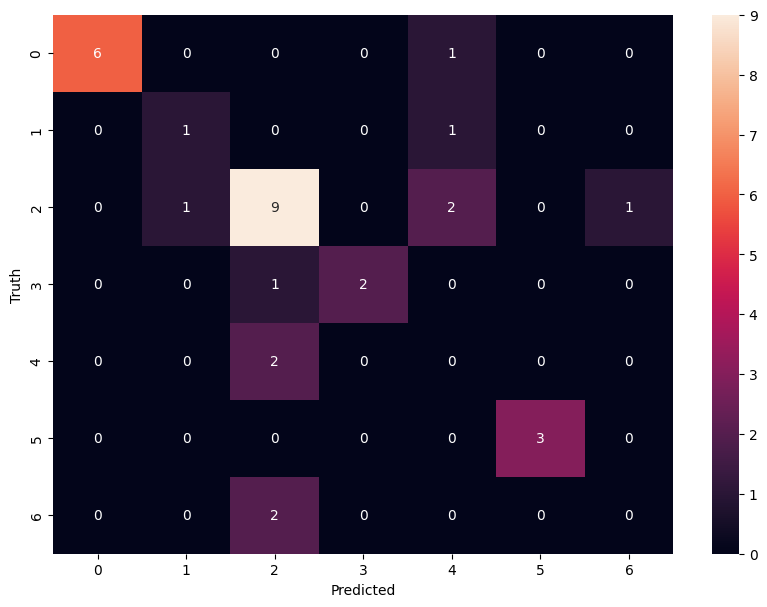

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')